In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#librerias para entrenamiento de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
#from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

 <font color='FIREBRICK' face='cambria' size=4> Retomamos la información del proyecto anterior.  </font>

 <font color='FIREBRICK' face='cambria'
       size=4> Cargamos el dataset incial</font>

In [2]:
#importamos el dataset y las primeras 5 instancias.
#Usamos el mismo dataset en dos diferentes para poder hacer un curado más adelante.
propiedades=pd.read_csv('Datos_propiedades.csv')
propiedades.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


 <font color='FIREBRICK' face='cambria' size=4> Como ya se realizó el análisis correspondiente en el proyecto, se procede al filtrado para el entrenamiento</font>

In [77]:
#Procedemos a tomar el dataset inicial para el filtrado de las instancias necesarias
FiltroRegion=propiedades["l2"]=="Capital Federal"
FiltroPropiedad=(propiedades["property_type"]=="Departamento") | (propiedades["property_type"]=="Casa") | (propiedades["property_type"]=="PH")
FiltroPrecio=(propiedades['price']<=4000000)
FiltroComparativa=(propiedades['surface_covered']<=propiedades['surface_total'])
FiltroTamaño=((propiedades['surface_total']>=15)&(propiedades['surface_total']<=1000))
FiltroScovered=(propiedades['surface_covered']>=15)
field=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'] 
propiedades_maching_learning=propiedades[field][FiltroRegion & FiltroPropiedad & FiltroPrecio&FiltroComparativa&FiltroTamaño&FiltroScovered]
propiedades_maching_learning.shape
propiedades_maching_learning.isnull().sum()
propiedades_ml_2 = propiedades_maching_learning.fillna(propiedades_maching_learning.mean())
propiedades_ml_2.shape


(81068, 6)

In [78]:
x1=propiedades_ml_2['surface_covered'].values
x2=propiedades_ml_2['surface_total'].values
x3=propiedades_ml_2['bathrooms'].values
x4=propiedades_ml_2['rooms'].values
#x5=p8['bedrooms'].values
y=propiedades_ml_2['price'].values
#Se escribieron todas las variables posibles, pero se decidió trabajar con 4 variables que son las más fuertemente correlacionadas.

In [79]:
X = np.vstack((x1,x2,x3,x4)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60801, 4) (60801,) (20267, 4) (20267,)


 <font color='FIREBRICK' face='cambria' size=4>Se procede a reentrenar, el modelo benchmark utilizado y el mejor modelo alcanzado en el proyecto</font>

In [80]:
#Modelo Benchmark
linear_model = LinearRegression()
#Modelos a entrenar
tree_regressor = DecisionTreeRegressor(max_depth=13, random_state=100)



In [81]:
#Entrenamos los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 186490.92215805393
Raíz del error cuadrático medio en Test: 181191.49835936844


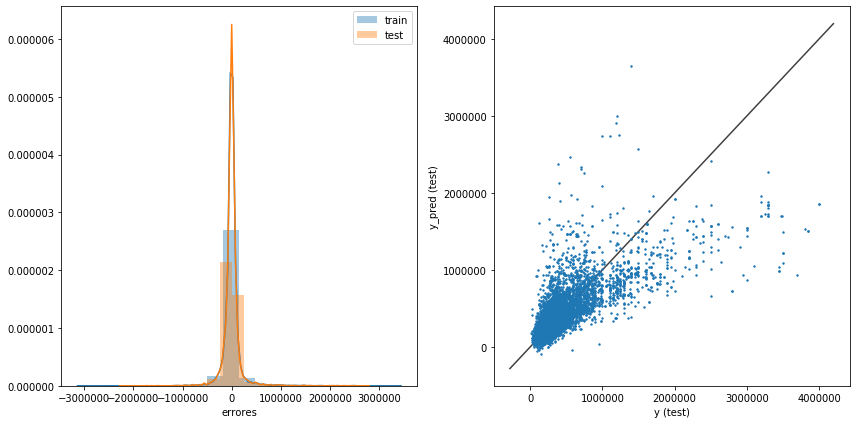

In [82]:
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    rmse_train_modelo_1 = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test_modelo_1 = np.sqrt(mean_squared_error(y_test, y_test_pred))

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 92109.63353797153
Raíz del error cuadrático medio en Test: 140059.7889875256


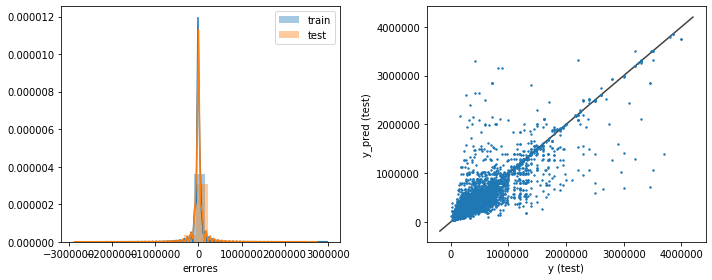

In [83]:
modelos = ['Árbol de Decisión']

for i, model in enumerate([tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    rmse_train_modelo_2 = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test_modelo_2 = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [84]:
#creamos una función para medir la mejora de modelos.
def mejora(rmse_test1,rmse_test2):

    rmse_test1 = rmse_test1
    rmse_test2 =rmse_test2
    
    mejora=100-((rmse_test2*100)/rmse_test1)
       
    print(f'% de mejora entre modelos: {mejora:5.2f}')

**Cuando se realizó el primer proyecto, la mejora entre el modelo Benchmarck fue:**

In [85]:
mejora(rmse_test_modelo_1,rmse_test_modelo_2)

% de mejora entre modelos: 22.70


 <font color='FIREBRICK' face='cambria' size=4> Como primera parte concluimos que el modelo arbol de decisión tuvo el mejor performance, ahora procedemos a reestructurar el proyecto para ver la mejoria en los modelos de entrenamiento
    </font>

<font align='/center;' color='black' face='arial' size=6> PROYECTO 2.</font>
    

<font align='/center;' color='red' face='arial' size=3> Procedemos a hacer Ingenieria de features.</font>

Cargamos de nueva cuenta nuestro dataset

In [86]:
propiedades_PD=propiedades.copy()

In [87]:
propiedades_PD.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


<font align='/center;' color='red' face='arial' size=3> Procedemos a investigar nuestros valores nulos, para determinar valores MAR, MCAR Y MNAR, para luego determinar el tipo de imputación a elegir.</font>

<font align='/center;' color='red' face='arial' size=3> Para ello, empezamos por agrupación de nuestros valores por columna.</font>

In [88]:
propiedades_PD.lat.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,1345
1,Casa de campo,17
2,Cochera,20
3,Departamento,7825
4,Depósito,79
5,Local comercial,27
6,Lote,125
7,Oficina,31
8,Otro,33
9,PH,423


In [89]:
propiedades_PD.lon.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,1359
1,Casa de campo,17
2,Cochera,20
3,Departamento,7837
4,Depósito,79
5,Local comercial,28
6,Lote,125
7,Oficina,31
8,Otro,35
9,PH,428


In [90]:
propiedades_PD.l3.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,0
1,Casa de campo,0
2,Cochera,0
3,Departamento,0
4,Depósito,0
5,Local comercial,0
6,Lote,0
7,Oficina,0
8,Otro,0
9,PH,0


In [91]:
propiedades_PD.rooms.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,0
1,Casa de campo,0
2,Cochera,0
3,Departamento,0
4,Depósito,0
5,Local comercial,0
6,Lote,0
7,Oficina,0
8,Otro,0
9,PH,0


In [92]:
propiedades_PD.bedrooms.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,0
1,Casa de campo,0
2,Cochera,0
3,Departamento,0
4,Depósito,0
5,Local comercial,0
6,Lote,0
7,Oficina,0
8,Otro,0
9,PH,0


In [93]:
propiedades_PD.bathrooms.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,1337
1,Casa de campo,21
2,Cochera,250
3,Departamento,2696
4,Depósito,229
5,Local comercial,171
6,Lote,835
7,Oficina,112
8,Otro,128
9,PH,178


In [94]:
propiedades_PD.surface_total.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,4917
1,Casa de campo,64
2,Cochera,257
3,Departamento,13577
4,Depósito,257
5,Local comercial,301
6,Lote,607
7,Oficina,264
8,Otro,154
9,PH,129


In [95]:
propiedades_PD.surface_covered.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,4865
1,Casa de campo,64
2,Cochera,257
3,Departamento,13889
4,Depósito,258
5,Local comercial,303
6,Lote,1279
7,Oficina,281
8,Otro,263
9,PH,155


In [96]:
propiedades_PD.l3.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,0
1,Casa de campo,0
2,Cochera,0
3,Departamento,0
4,Depósito,0
5,Local comercial,0
6,Lote,0
7,Oficina,0
8,Otro,0
9,PH,0


In [97]:
propiedades_PD.price.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,0
1,Casa de campo,0
2,Cochera,0
3,Departamento,0
4,Depósito,0
5,Local comercial,0
6,Lote,0
7,Oficina,0
8,Otro,0
9,PH,0


In [98]:
propiedades_PD.l2.isnull().groupby([propiedades_PD['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,0
1,Casa de campo,0
2,Cochera,0
3,Departamento,0
4,Depósito,0
5,Local comercial,0
6,Lote,0
7,Oficina,0
8,Otro,0
9,PH,0


In [99]:
#Eliminamos columnas que no nos aportan valor en este momento
propiedades_PD_2=propiedades_PD[['lat','lon','l2','l3','rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

In [100]:
propiedades_PD2=propiedades_PD_2.copy()


Las variables correlacionadas son lat y lon  y por otro lado  surface_total con surface_covered. Tambien parece haber una relación de valores Nan con los baños, para ello binarizaremos las variables relacionadas.

In [101]:
propiedades_PD2['lat-intervalos'] = pd.cut(propiedades_PD2.lat, bins  = 50000)
propiedades_PD2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat-intervalos
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"(-34.608, -34.606]"
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,"(-34.625, -34.623]"
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,"(-34.594, -34.591]"
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,"(-34.582, -34.579]"
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,"(-34.916, -34.914]"
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,"(-34.818, -34.815]"
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,"(-34.447, -34.445]"
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,"(-34.447, -34.445]"
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,"(-34.447, -34.445]"


In [102]:
vf_lat_lon = propiedades_PD2.lon.isnull().groupby([propiedades_PD2['lat-intervalos']]).sum().astype(int).reset_index(name='count')
vf_lat_lon

,lat-intervalos,count
0,"(-35.439, -35.316]",0
1,"(-35.316, -35.314]",0
2,"(-35.314, -35.311]",0
3,"(-35.311, -35.309]",0
4,"(-35.309, -35.306]",0
...,...,...
49995,"(85.039, 85.041]",0
49996,"(85.041, 85.044]",0
49997,"(85.044, 85.046]",0
49998,"(85.046, 85.049]",0


In [103]:
vf_lat_lon['freq'] = vf_lat_lon['count']/propiedades_PD2.groupby([propiedades_PD2['lat-intervalos']]).count()['lat'].values
vf_lat_lon

,lat-intervalos,count,freq
0,"(-35.439, -35.316]",0,0.0
1,"(-35.316, -35.314]",0,NaN
2,"(-35.314, -35.311]",0,NaN
3,"(-35.311, -35.309]",0,NaN
4,"(-35.309, -35.306]",0,NaN
...,...,...,...
49995,"(85.039, 85.041]",0,NaN
49996,"(85.041, 85.044]",0,NaN
49997,"(85.044, 85.046]",0,NaN
49998,"(85.046, 85.049]",0,NaN


In [104]:
vf_lat_lon["bin_centres"] = vf_lat_lon["lat-intervalos"].apply(lambda x: x.mid)
vf_lat_lon

,lat-intervalos,count,freq,bin_centres
0,"(-35.439, -35.316]",0,0.0,-35.3775
1,"(-35.316, -35.314]",0,NaN,-35.3150
2,"(-35.314, -35.311]",0,NaN,-35.3125
3,"(-35.311, -35.309]",0,NaN,-35.3100
4,"(-35.309, -35.306]",0,NaN,-35.3075
...,...,...,...,...
49995,"(85.039, 85.041]",0,NaN,85.0400
49996,"(85.041, 85.044]",0,NaN,85.0425
49997,"(85.044, 85.046]",0,NaN,85.0450
49998,"(85.046, 85.049]",0,NaN,85.0475


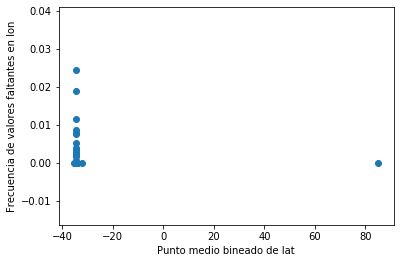

In [105]:
plt.scatter(vf_lat_lon['bin_centres'], vf_lat_lon['freq'])
plt.xlabel('Punto medio bineado de lat')
plt.ylabel('Frecuencia de valores faltantes en lon')
plt.show()

In [106]:
propiedades_PD2['lon-intervalos'] = pd.cut(propiedades_PD2.lon, bins  = 50000)
propiedades_PD2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat-intervalos,lon-intervalos
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"(-34.608, -34.606]","(-58.385, -58.383]"
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,"(-34.625, -34.623]","(-58.414, -58.412]"
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,"(-34.594, -34.591]","(-58.429, -58.427]"
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,"(-34.582, -34.579]","(-58.439, -58.436]"
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,"(-34.916, -34.914]","(-57.94, -57.938]"
...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,"(-34.818, -34.815]","(-58.182, -58.18]"
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,"(-34.447, -34.445]","(-58.94, -58.937]"
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,"(-34.447, -34.445]","(-58.984, -58.981]"
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,"(-34.447, -34.445]","(-58.984, -58.981]"


In [107]:
vf_lon_lat = propiedades_PD2.lat.isnull().groupby([propiedades_PD2['lon-intervalos']]).sum().astype(int).reset_index(name='count')
vf_lon_lat

,lon-intervalos,count
0,"(-180.122, -179.998]",0
1,"(-179.998, -179.995]",0
2,"(-179.995, -179.993]",0
3,"(-179.993, -179.99]",0
4,"(-179.99, -179.988]",0
...,...,...
49995,"(-57.818, -57.816]",0
49996,"(-57.816, -57.813]",0
49997,"(-57.813, -57.811]",0
49998,"(-57.811, -57.808]",0


In [108]:
vf_lon_lat['freq'] = vf_lon_lat['count']/propiedades_PD2.groupby([propiedades_PD2['lon-intervalos']]).count()['lon'].values
vf_lon_lat

,lon-intervalos,count,freq
0,"(-180.122, -179.998]",0,0.0
1,"(-179.998, -179.995]",0,NaN
2,"(-179.995, -179.993]",0,NaN
3,"(-179.993, -179.99]",0,NaN
4,"(-179.99, -179.988]",0,NaN
...,...,...,...
49995,"(-57.818, -57.816]",0,NaN
49996,"(-57.816, -57.813]",0,NaN
49997,"(-57.813, -57.811]",0,NaN
49998,"(-57.811, -57.808]",0,NaN


In [109]:
vf_lon_lat["bin_centres"] = vf_lon_lat["lon-intervalos"].apply(lambda x: x.mid)
vf_lon_lat

,lon-intervalos,count,freq,bin_centres
0,"(-180.122, -179.998]",0,0.0,-180.0600
1,"(-179.998, -179.995]",0,NaN,-179.9965
2,"(-179.995, -179.993]",0,NaN,-179.9940
3,"(-179.993, -179.99]",0,NaN,-179.9915
4,"(-179.99, -179.988]",0,NaN,-179.9890
...,...,...,...,...
49995,"(-57.818, -57.816]",0,NaN,-57.8170
49996,"(-57.816, -57.813]",0,NaN,-57.8145
49997,"(-57.813, -57.811]",0,NaN,-57.8120
49998,"(-57.811, -57.808]",0,NaN,-57.8095


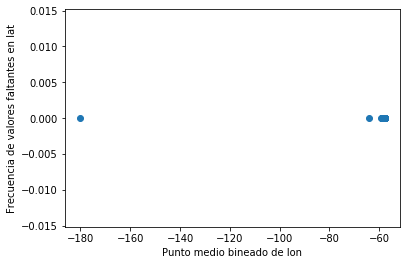

In [110]:
plt.scatter(vf_lon_lat['bin_centres'], vf_lon_lat['freq'])
plt.xlabel('Punto medio bineado de lon')
plt.ylabel('Frecuencia de valores faltantes en lat')
plt.show()

Como primer conclusión, no encontramos una relación de datos faltantes MNAR

In [111]:
propiedades_PD2['surface_covered-intervalos'] = pd.cut(propiedades_PD2.surface_covered, bins  = 10000)
propiedades_PD2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat-intervalos,lon-intervalos,surface_covered-intervalos
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"(-34.608, -34.606]","(-58.385, -58.383]","(139.667, 152.273]"
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,"(-34.625, -34.623]","(-58.414, -58.412]","(51.424, 64.03]"
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,"(-34.594, -34.591]","(-58.429, -58.427]","(38.818, 51.424]"
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,"(-34.582, -34.579]","(-58.439, -58.436]","(38.818, 51.424]"
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,"(-34.916, -34.914]","(-57.94, -57.938]","(26.212, 38.818]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,"(-34.818, -34.815]","(-58.182, -58.18]","(38.818, 51.424]"
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,"(-34.447, -34.445]","(-58.94, -58.937]","(89.243, 101.849]"
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,"(-34.447, -34.445]","(-58.984, -58.981]","(26.212, 38.818]"
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,"(-34.447, -34.445]","(-58.984, -58.981]","(26.212, 38.818]"


In [112]:
vf_covered_total = propiedades_PD2.surface_total.isnull().groupby([propiedades_PD2['surface_covered-intervalos']]).sum().astype(int).reset_index(name='count')
vf_covered_total

,surface_covered-intervalos,count
0,"(-125.061, 13.606]",70
1,"(13.606, 26.212]",5
2,"(26.212, 38.818]",51
3,"(38.818, 51.424]",97
4,"(51.424, 64.03]",60
...,...,...
9995,"(125998.969, 126011.576]",0
9996,"(126011.576, 126024.182]",0
9997,"(126024.182, 126036.788]",0
9998,"(126036.788, 126049.394]",0


In [113]:
vf_covered_total['freq'] = vf_covered_total['count']/propiedades_PD2.groupby([propiedades_PD2['surface_covered-intervalos']]).count()['surface_covered'].values
vf_covered_total

,surface_covered-intervalos,count,freq
0,"(-125.061, 13.606]",70,0.472973
1,"(13.606, 26.212]",5,0.003333
2,"(26.212, 38.818]",51,0.003896
3,"(38.818, 51.424]",97,0.003819
4,"(51.424, 64.03]",60,0.003302
...,...,...,...
9995,"(125998.969, 126011.576]",0,NaN
9996,"(126011.576, 126024.182]",0,NaN
9997,"(126024.182, 126036.788]",0,NaN
9998,"(126036.788, 126049.394]",0,NaN


In [114]:
vf_covered_total["bin_centres"] = vf_covered_total["surface_covered-intervalos"].apply(lambda x: x.mid)
vf_covered_total

,surface_covered-intervalos,count,freq,bin_centres
0,"(-125.061, 13.606]",70,0.472973,-55.7275
1,"(13.606, 26.212]",5,0.003333,19.9090
2,"(26.212, 38.818]",51,0.003896,32.5150
3,"(38.818, 51.424]",97,0.003819,45.1210
4,"(51.424, 64.03]",60,0.003302,57.7270
...,...,...,...,...
9995,"(125998.969, 126011.576]",0,NaN,126005.2725
9996,"(126011.576, 126024.182]",0,NaN,126017.8790
9997,"(126024.182, 126036.788]",0,NaN,126030.4850
9998,"(126036.788, 126049.394]",0,NaN,126043.0910


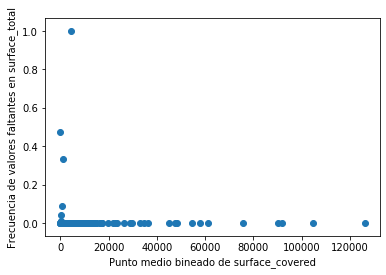

In [115]:
plt.scatter(vf_covered_total['bin_centres'], vf_covered_total['freq'])
plt.xlabel('Punto medio bineado de surface_covered')
plt.ylabel('Frecuencia de valores faltantes en surface_total')
plt.show()

In [116]:
propiedades_PD2['surface_total-intervalos'] = pd.cut(propiedades_PD2.surface_total, bins  = 10000)
propiedades_PD2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat-intervalos,lon-intervalos,surface_covered-intervalos,surface_total-intervalos
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"(-34.608, -34.606]","(-58.385, -58.383]","(139.667, 152.273]","(126.123, 145.477]"
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,"(-34.625, -34.623]","(-58.414, -58.412]","(51.424, 64.03]","(68.062, 87.416]"
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,"(-34.594, -34.591]","(-58.429, -58.427]","(38.818, 51.424]","(29.354, 48.708]"
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,"(-34.582, -34.579]","(-58.439, -58.436]","(38.818, 51.424]","(68.062, 87.416]"
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,"(-34.916, -34.914]","(-57.94, -57.938]","(26.212, 38.818]","(48.708, 68.062]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,"(-34.818, -34.815]","(-58.182, -58.18]","(38.818, 51.424]","(48.708, 68.062]"
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,"(-34.447, -34.445]","(-58.94, -58.937]","(89.243, 101.849]","(145.477, 164.831]"
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,"(-34.447, -34.445]","(-58.984, -58.981]","(26.212, 38.818]","(48.708, 68.062]"
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,"(-34.447, -34.445]","(-58.984, -58.981]","(26.212, 38.818]","(29.354, 48.708]"


In [117]:
vf_total_covered = propiedades_PD2.surface_covered.isnull().groupby([propiedades_PD2['surface_total-intervalos']]).sum().astype(int).reset_index(name='count')
vf_total_covered

,surface_total-intervalos,count
0,"(-183.539, 29.354]",26
1,"(29.354, 48.708]",203
2,"(48.708, 68.062]",226
3,"(68.062, 87.416]",109
4,"(87.416, 106.77]",72
...,...,...
9995,"(193452.23, 193471.584]",0
9996,"(193471.584, 193490.938]",0
9997,"(193490.938, 193510.292]",0
9998,"(193510.292, 193529.646]",0


In [118]:
vf_total_covered['freq']= vf_covered_total['count']/propiedades_PD2.groupby([propiedades_PD2['surface_total-intervalos']]).count()['surface_total'].values
vf_total_covered

,surface_total-intervalos,count,freq
0,"(-183.539, 29.354]",26,0.037116
1,"(29.354, 48.708]",203,0.000211
2,"(48.708, 68.062]",226,0.001879
3,"(68.062, 87.416]",109,0.005314
4,"(87.416, 106.77]",72,0.005178
...,...,...,...
9995,"(193452.23, 193471.584]",0,NaN
9996,"(193471.584, 193490.938]",0,NaN
9997,"(193490.938, 193510.292]",0,NaN
9998,"(193510.292, 193529.646]",0,NaN


In [119]:
vf_total_covered["bin_centres"]= vf_total_covered["surface_total-intervalos"].apply(lambda x: x.mid)
vf_total_covered

,surface_total-intervalos,count,freq,bin_centres
0,"(-183.539, 29.354]",26,0.037116,-77.0925
1,"(29.354, 48.708]",203,0.000211,39.0310
2,"(48.708, 68.062]",226,0.001879,58.3850
3,"(68.062, 87.416]",109,0.005314,77.7390
4,"(87.416, 106.77]",72,0.005178,97.0930
...,...,...,...,...
9995,"(193452.23, 193471.584]",0,NaN,193461.9070
9996,"(193471.584, 193490.938]",0,NaN,193481.2610
9997,"(193490.938, 193510.292]",0,NaN,193500.6150
9998,"(193510.292, 193529.646]",0,NaN,193519.9690


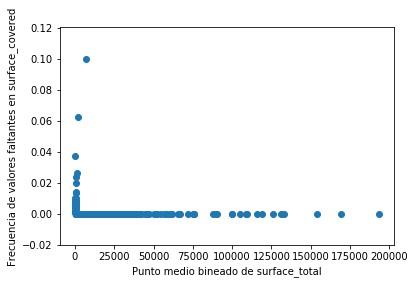

In [120]:
plt.scatter(vf_total_covered['bin_centres'], vf_total_covered['freq'])
plt.xlabel('Punto medio bineado de surface_total')
plt.ylabel('Frecuencia de valores faltantes en surface_covered')
plt.show()

todo parece indicar que a pesar de la relación entre algunas variables, los datos faltantes son MCAR. Procedemos al siguiente paso para la imputación de datos faltantes

In [121]:
propiedades_2=propiedades_PD.copy()

<font align='/center;' color='red' face='arial' size=3> Para la reingenieria de features se haran los siguientes tratamientos.</font>

<font align='/center;' color='red' face='arial' size=3> -Eliminación outliers, imputación de valores,one hot encoding, y PCA.</font>.

<font align='/center;' color='brown' face='arial' size=3> Se haran las siguientes estrategias debido al tipo de datos recibidos y por que consideramos con estas estrategias mantendremos la mayor información importante en los datos de entrenamiento, Se haran en el orden mencionado ya que antes de imputar valores requerimos eliminar los valores outliers..</font>.

A continuación realizaremos los siguientes pasos para poder mantener la mayor cantidad de valores sin imputar y buscando de una vez eliminar los outliers.

In [122]:
#Descartamos las columnas que no utilizaremos.
columnas_descartables=propiedades[['start_date','end_date','created_on','l1','currency','title','description','operation_type']]
propiedades_pruebas=propiedades.drop(columns=(columnas_descartables))

In [123]:
#Checamos valores nulos
propiedades_pruebas.isnull().sum()

lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [124]:
#Checamos el tipo de valor en cada columna, nos percatamos que en columna bedrooms tiene valores igual a 0
propiedades_2['bedrooms'].value_counts()

1.0     49705
2.0     46010
3.0     31459
4.0      9078
0.0      7138
5.0      2074
6.0       768
7.0       258
8.0        65
9.0        32
10.0       23
12.0       16
11.0       14
14.0        8
13.0        6
15.0        6
Name: bedrooms, dtype: int64

***En este paso es importante mencionar, que analizamos las columnas, y vimos que bedrooms tiene varias filas con valores igual a 0, por ello lo que se busca en el siguiente paso es cambiar los valores null por un valor que no afecte el dataset.***

In [125]:
pruebas=propiedades_pruebas.fillna(-200)


In [126]:
#Aqui se busca categorizar y señalar las filas con valores nulos desde el inicio, para una vez haciendo eliminación de outliers no se pierdan y no los eliminemos
nuevo=['lat_2','lon_2','rooms_2','bedrooms_2','bathrooms_2','surface_total_2','surface_covered_2','price_2']
for  n,columna in enumerate(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms','surface_total', 'surface_covered', 'price']):
    pruebas[nuevo[n]]=pruebas.apply(lambda x: 0 if int(x[columna]) ==-200 else 1, axis=1)
    
pruebas

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,lat_2,lon_2,rooms_2,bedrooms_2,bathrooms_2,surface_total_2,surface_covered_2,price_2
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,1,1,1,1,1,1,1,1
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,1,1,1,1,1,1,1,1
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,1,1,1,1,1,1,1,1
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,1,1,1,1,1,1,1,1
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,1,1,1,1,1,1,1,1
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,1,1,1,1,1,1,1,1
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,1,1,1,1,1,1,1,1
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,1,1,1,1,1,1,1,1


In [127]:
#GVolvemos a poner en valores nulos los que estaban incialmente, con la finalidad que no afecte el calculo de outliers.
pruebas[['lat','lon','bathrooms','surface_covered','surface_total']]=pruebas[['lat','lon','bathrooms','surface_covered','surface_total']].replace(-200,np.nan)
pruebas.isnull().sum()

lat                   9925
lon                   9959
l2                       0
l3                       0
rooms                    0
bedrooms                 0
bathrooms             5957
surface_total        20527
surface_covered      21614
price                    0
property_type            0
lat_2                    0
lon_2                    0
rooms_2                  0
bedrooms_2               0
bathrooms_2              0
surface_total_2          0
surface_covered_2        0
price_2                  0
dtype: int64

In [128]:
#Eliminamos columnas que no requerimos se les haga eliminación de outliers.
pruebas2=pruebas.drop(columns=['lat','lon','lat_2','lon_2','rooms_2','bedrooms_2','bathrooms_2','surface_total_2','surface_covered_2','price_2'])
pruebas2

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


In [129]:
#Calculo elcuartil #1 y el cuarti #3
Q1 = pruebas2.quantile(0.25)
Q3 = pruebas2.quantile(0.75)
# Calculo un Indice restando el cuartil 3 con el cuartil 1
IQR = Q3 - Q1
#genero una mascara que traiga todos las instancias del dataset que esten por debajo del quartil 1 menos el coeficiente IQR  y por sobre el cuartil 3 mas el coeficiente IQR
mask = (pruebas2< (Q1 - 1.5 * IQR)) | (pruebas2 > (Q3 + 1.5 * IQR))
pruebas2[mask]=np.nan
pruebas2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,145213.000000,146232.000000,135108.000000,112681.000000,114922.000000,135678.000000
mean,3.019013,1.965315,1.482458,88.922232,74.755147,182307.854597
std,1.263711,1.099585,0.665577,53.205190,38.689810,98600.255115
min,1.000000,0.000000,1.000000,10.000000,1.000000,5500.000000
25%,2.000000,1.000000,1.000000,50.000000,45.000000,109000.000000
50%,3.000000,2.000000,1.000000,72.000000,64.000000,158000.000000
75%,4.000000,3.000000,2.000000,111.000000,95.000000,238000.000000
max,7.000000,6.000000,3.000000,272.000000,199.000000,496000.000000


In [130]:
#Juntamos con las columnas que eliminamos en un principio
columnas_descartables= ['bathrooms','surface_covered','surface_total','price','l2','l3','bedrooms','rooms','property_type']
propiedades_descartadas=pruebas.drop(columns=columnas_descartables)
propiedades_PD5=pd.concat([pruebas2,propiedades_descartadas],axis=1)
propiedades_PD5.head(5)


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,lat,lon,lat_2,lon_2,rooms_2,bedrooms_2,bathrooms_2,surface_total_2,surface_covered_2,price_2
0,Capital Federal,San Cristobal,7.0,NaN,2.0,140.0,140.0,153000.0,Departamento,-34.605880,-58.384949,1,1,1,1,1,1,1,1
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,-34.624056,-58.412110,1,1,1,1,1,1,1,1
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,-34.593569,-58.427474,1,1,1,1,1,1,1,1
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,-34.581294,-58.436754,1,1,1,1,1,1,1,1
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH,-34.914194,-57.938219,1,1,1,1,1,1,1,1


A continuación se realiza un filtro, para eliminar los nan que salieron outliers, pero los valores que deben permanecer dentro para la imputación se determinara con las columnas que se crearon inicialmente como una marca para saber cuales debian quedar para imputación y cuales eliminación para outliers.

In [131]:
#Creamos un filtro para eliminar outliers nan y dejar los nan que no corresponden al filtro de outliers.
propiedades_PD6=propiedades_PD5
mask1=((propiedades_PD6['bedrooms_2']==1)&(propiedades_PD6['bedrooms']>=0))|((propiedades_PD6['bedrooms']==np.NaN)|(propiedades_PD6['bedrooms_2']==0))  
mask2=((propiedades_PD6['bathrooms_2']==1)&(propiedades_PD6['bathrooms']>0))|((propiedades_PD6['bathrooms']==np.NaN)|(propiedades_PD6['bathrooms_2']==0))  
mask3=((propiedades_PD6['rooms_2']==1)&(propiedades_PD6['rooms']>0))|((propiedades_PD6['rooms']==np.NaN)|(propiedades_PD6['rooms_2']==0))  
mask4=((propiedades_PD6['surface_covered_2']==1)&(propiedades_PD6['surface_covered']>0))|((propiedades_PD6['surface_covered']==np.NaN)|(propiedades_PD6['surface_covered_2']==0))  
mask5=((propiedades_PD6['surface_total_2']==1)&(propiedades_PD6['surface_total']>0))|((propiedades_PD6['surface_total']==np.NaN)|(propiedades_PD6['surface_total_2']==0)) 
mask6=((propiedades_PD6['price_2']==1)&(propiedades_PD6['price']>0))|((propiedades_PD6['price']==np.NaN)|(propiedades_PD6['price_2']==0))  


propiedades_PD7=propiedades_PD6[mask1&mask2&mask3&mask4&mask5&mask6]

In [132]:
propiedades_PD7

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,lat,lon,lat_2,lon_2,rooms_2,bedrooms_2,bathrooms_2,surface_total_2,surface_covered_2,price_2
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,-34.624056,-58.412110,1,1,1,1,1,1,1,1
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,-34.593569,-58.427474,1,1,1,1,1,1,1,1
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,-34.581294,-58.436754,1,1,1,1,1,1,1,1
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH,-34.914194,-57.938219,1,1,1,1,1,1,1,1
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,-34.593779,-58.441239,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,-34.816348,-58.181963,1,1,1,1,1,1,1,1
146656,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,-34.446459,-58.937810,1,1,1,1,1,1,1,1
146657,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,-34.444633,-58.981606,1,1,1,1,1,1,1,1
146658,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,-34.444830,-58.981796,1,1,1,1,1,1,1,1


In [133]:
#Eliminamos definitivamente las columnas creadas inicialmente
columnas_descartables=['lat_2','lon_2','rooms_2','bedrooms_2','bathrooms_2','surface_total_2','surface_covered_2','price_2']
propiedades_entrenamiento=propiedades_PD7.drop(columns=columnas_descartables,axis=1)

In [134]:
#Seleccionamos columnas para imputación.
propiedades_imp=propiedades_entrenamiento[['lat','lon','bathrooms','surface_total','surface_covered','price']]

In [135]:
#Imputamos por valores medios ya que nuestros datos faltantes son MCAR
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df2=pd.DataFrame(imp_mean.fit_transform(propiedades_imp),
                   columns=propiedades_imp.columns,
                   index=propiedades_imp.index)
df2.head()

,lat,lon,bathrooms,surface_total,surface_covered,price
1,-34.624056,-58.412110,2.0,70.0,58.0,159000.0
2,-34.593569,-58.427474,1.0,45.0,45.0,125000.0
3,-34.581294,-58.436754,1.0,85.0,50.0,295000.0
4,-34.914194,-57.938219,1.0,50.0,35.0,40000.0
5,-34.593779,-58.441239,1.0,56.0,56.0,150000.0


In [136]:
#Juntamos con las columnas apartadas anteriormente.
columnas_descartables= ['lat','lon','bathrooms','surface_total','surface_covered','price']
propiedades_descartadas=propiedades_entrenamiento.drop(columns=columnas_descartables)
propiedades_10=pd.concat([df2,propiedades_descartadas],axis=1)
propiedades_10.head(10)



,lat,lon,bathrooms,surface_total,surface_covered,price,l2,l3,rooms,bedrooms,property_type
1,-34.624056,-58.412110,2.0,70.0,58.0,159000.0,Capital Federal,Boedo,2.0,1.0,PH
2,-34.593569,-58.427474,1.0,45.0,45.0,125000.0,Capital Federal,Palermo,2.0,1.0,PH
3,-34.581294,-58.436754,1.0,85.0,50.0,295000.0,Capital Federal,Palermo,2.0,1.0,PH
4,-34.914194,-57.938219,1.0,50.0,35.0,40000.0,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,PH
5,-34.593779,-58.441239,1.0,56.0,56.0,150000.0,Capital Federal,Villa Crespo,2.0,1.0,PH
6,-34.600988,-58.433061,1.0,70.0,70.0,159500.0,Capital Federal,Villa Crespo,2.0,1.0,PH
7,-34.600988,-58.433061,1.0,70.0,70.0,159500.0,Capital Federal,Villa Crespo,2.0,1.0,PH
8,-34.639598,-58.419612,1.0,45.0,37.0,89000.0,Capital Federal,Parque Patricios,1.0,1.0,PH
9,-34.639598,-58.419612,1.0,45.0,37.0,89000.0,Capital Federal,Parque Patricios,1.0,1.0,PH
10,-34.586225,-58.496220,2.0,66.0,49.0,170000.0,Capital Federal,Villa Pueyrredón,2.0,1.0,PH


Procedemos a ver que variables podemos realizarle one hot encoding.

In [137]:
#Visualizamos los valores unicos por cada columna, para checar cuales son posibles a one hot encoding.
for col in propiedades_10.columns:
    print(col,':',len(propiedades_10[col].unique()),'labels')

lat : 48959 labels
lon : 49227 labels
bathrooms : 4 labels
surface_total : 264 labels
surface_covered : 200 labels
price : 5824 labels
l2 : 4 labels
l3 : 89 labels
rooms : 7 labels
bedrooms : 7 labels
property_type : 10 labels


***Elegimos realizar one hot encoding, a las columnas: l3, l2 y property_type***

Para no ampliar con muchas columnas el dataset, procedemos a usar una técnica en la cúal solo es tomamos como prioridad el top 20 de valores para hacerle el one hot encoding. Dejando los démas fuera de esta categoria y formando una sola.

In [138]:
propiedades_10.l3.value_counts().sort_values(ascending=False).head(20)

Palermo            10939
Tigre               7334
Almagro             7238
Villa Crespo        6269
Caballito           5992
Belgrano            5429
Recoleta            4472
La Plata            3297
Villa Urquiza       3215
La Matanza          3191
Lomas de Zamora     2996
Tres de Febrero     2882
Balvanera           2847
Barrio Norte        2825
Vicente López       2694
Pilar               2356
Flores              2349
Morón               1931
San Isidro          1729
Nuñez               1720
Name: l3, dtype: int64

In [139]:
propiedades7=propiedades_10.copy()


In [140]:
top_20=[x for x in propiedades7.l3.value_counts().sort_values(ascending=False).head(20).index]
top_20

['Palermo',
 'Tigre',
 'Almagro',
 'Villa Crespo',
 'Caballito',
 'Belgrano',
 'Recoleta',
 'La Plata',
 'Villa Urquiza',
 'La Matanza',
 'Lomas de Zamora',
 'Tres de Febrero',
 'Balvanera',
 'Barrio Norte',
 'Vicente López',
 'Pilar',
 'Flores',
 'Morón',
 'San Isidro',
 'Nuñez']

In [141]:
#Se procede a hacer one hot encoding al top 20
for label in top_20:
    propiedades7[label]=np.where(propiedades7['l3']==label,1,0)
    
dummies_l3=propiedades7[['l3']+top_20].head(122754)
dummies_l3.head(60)

,l3,Palermo,Tigre,Almagro,Villa Crespo,Caballito,Belgrano,Recoleta,La Plata,Villa Urquiza,...,Lomas de Zamora,Tres de Febrero,Balvanera,Barrio Norte,Vicente López,Pilar,Flores,Morón,San Isidro,Nuñez
1,Boedo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Palermo,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Palermo,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,La Plata,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Villa Crespo,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Villa Crespo,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Villa Crespo,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Parque Patricios,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Parque Patricios,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Villa Pueyrredón,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
dummies_l3.drop(columns='l3')
dummies_l2=pd.get_dummies(propiedades_10.l2,drop_first=True)
dummies_property_type=pd.get_dummies(propiedades_10.property_type,drop_first=True)
propiedades_e=propiedades_10.drop(columns=['l2','property_type'])
propiedades_dummies=pd.concat([propiedades_e,dummies_l3,dummies_l2,dummies_property_type],axis=1,sort=True)
propiedades_dummies.isnull().sum()
propiedades_final=propiedades_dummies.drop(columns=['l3'])

Procedemos al entrenamiento del modelo 

In [143]:
X=propiedades_final.drop(['price','lon','surface_total','bedrooms'],axis='columns')
y=propiedades_final.price


Gráficamos nuestra elección de tamaño de redimensionamiento para evaluar con cuanto dato real estabamos trabajando.

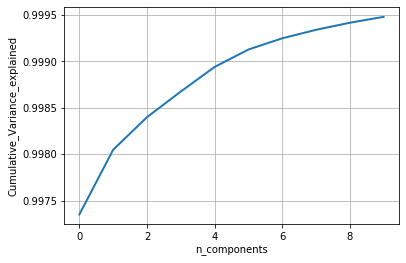

In [144]:
pca=PCA()  
pca.n_components=10
pca_data=pca.fit_transform(X)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.savefig('PCAcomponents.png')

plt.show()

In [145]:
pca = PCA(n_components=10)
X_nuevo = pca.fit_transform(X) 

In [146]:
#Entrenamos con todo el dataset resultante.
X_train, X_test, y_train, y_test = train_test_split(
    X_nuevo, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(92065, 10) (92065,) (30689, 10) (30689,)


In [73]:
#Entrenamos nuestros 2 modelos inicales.
linear_model_curado = LinearRegression()
tree_regressor_curado = DecisionTreeRegressor(max_depth=13, random_state=100)


In [74]:
#Entrenamos los modelos
linear_model_curado.fit(X_train, y_train)
tree_regressor_curado.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 62631.06373182725
Raíz del error cuadrático medio en Test: 62089.80920414183


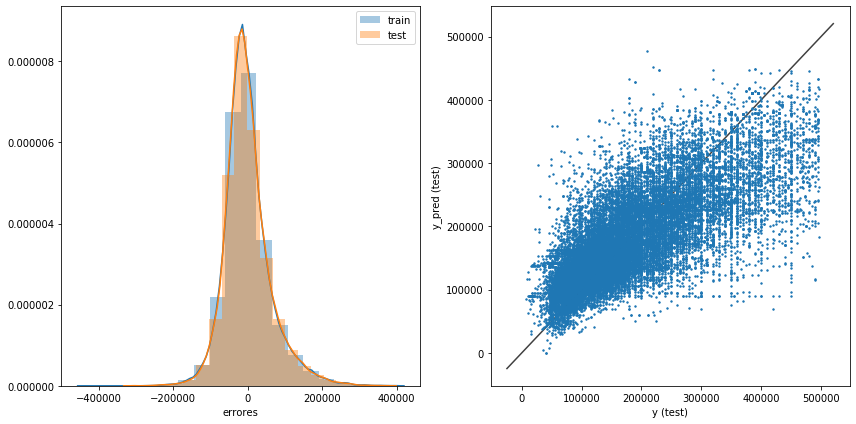

In [75]:
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model_curado]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    
    rmse_train_modelo_3 = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test_modelo_3 = np.sqrt(mean_squared_error(y_test, y_test_pred))


Modelo: Arbol de decisión
Raíz del error cuadrático medio en Train: 41282.80008512975
Raíz del error cuadrático medio en Test: 48797.3217894239


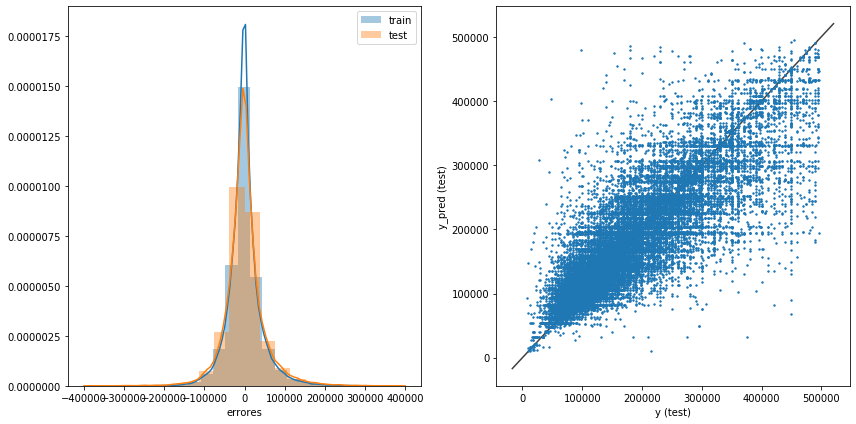

In [76]:
modelo = ['Arbol de decisión']

for i, model in enumerate([tree_regressor_curado]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    
    rmse_train_modelo_4 = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test_modelo_4 = np.sqrt(mean_squared_error(y_test, y_test_pred))

% de mejora entre modelos:Arbol de decisión vs Arbol de decisión
% de mejora entre modelos: 65.16


<Figure size 864x576 with 0 Axes>

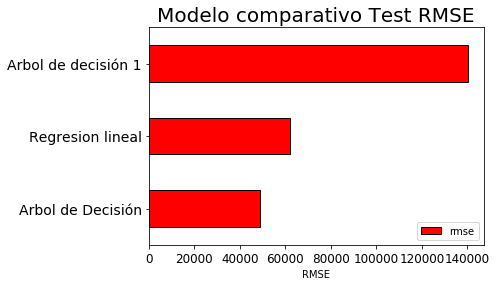

In [77]:
fig=plt.figure(figsize=(12,8))

model_comparison = pd.DataFrame({'model': ['Arbol de decisión 1','Regresion lineal', 'Arbol de Decisión',
                                                                            ],
                                 'rmse': [rmse_test_modelo_2,rmse_test_modelo_3, rmse_test_modelo_4, 
                                         ]})

model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 12)
plt.title('Modelo comparativo Test RMSE', size = 20);

fig.autofmt_xdate()
fig.autofmt_xdate()
fig.tight_layout()

print('% de mejora entre modelos:Arbol de decisión vs Arbol de decisión')
mejora(rmse_test_modelo_2,rmse_test_modelo_4)

                                                                           


Podemos vizualizar, que al realizar técnicas como; Imputación por valores medios, one hot enconding, PCA y elimnación de outliers los 2 modelos iniciales mejoran.

<font align='/center;' color='red' face='arial' size=5>¿Qué podemos aprender de nuestro problema estudiando el modelo que generamos?.</font>

***Considero que la razón de la mejora se debe a que al hacer el tratamiento con one hot encoding principalmente se usa*** ***mayor información valiosa y al realizarle el PCA se busca trabajar con menos datos pero de igual manera bastante*** ***importantes.***

<font align='/center;' color='red' face='arial' size=4>¿Cuáles son las causas del cambio en el desempeño de los modelos?.</font>

Si analizamos todo el proceso realizado, nos podremos percatar que en un inicio se hizo de un poco más del 50% de la información de valor sin embargo considero que la mejora en el desempeño se debe principalmente a la realización del one hot encoding, ya que con ello se logra dar valor a variables categoricas que importan a la hora de realizar predicciones, a su vez otro paso crucial es la normalización de los datos, ya que con ello se logra trabajar con mejor forma sobre los datos obtenidos.

En conclusión podemos darnos cuenta que siempre hay información valiosa que tomar en cuenta, siempre y cuando se sigan algunos pasos especificos, podremos sacar buen partido de la poca o mucha información que se tenga.

 <font color='FIREBRICK' face='cambria' size=7> Modelos Avanzados.</font>

 <font color='FIREBRICK' face='cambria' size=4> Procedemos a entrenar modelos más avanzados para mejorar nuestro performance.
    </font>

In [147]:
#Creamos una función para evaluar nuestros modelos.
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train= np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
   
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()   



***Realizamos un ciclo para nuestro modelo polinomial con regularización, en la siguiente parte tomamos nuestro mejor modelo y realizamos de manera individual el proceso.***

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 1


Raíz del error cuadrático medio en Train: 62631.06373182725
Raíz del error cuadrático medio en Test: 62089.80920414183


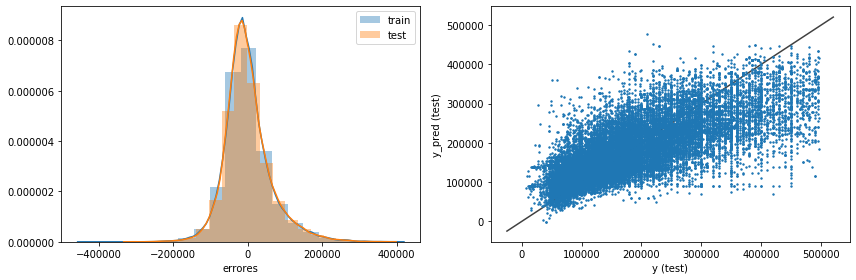



regresion con regularizacion ridge


Raíz del error cuadrático medio en Train: 62631.063731832044
Raíz del error cuadrático medio en Test: 62089.80937266973


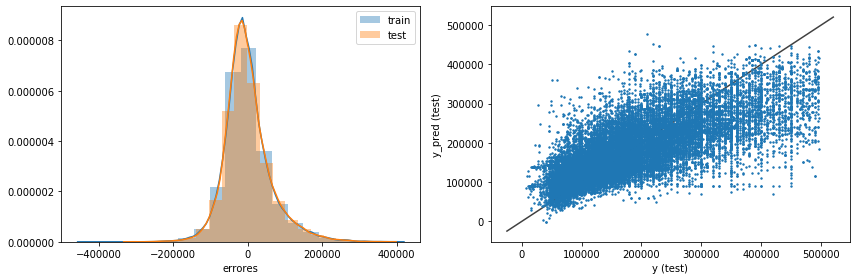





REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 2


Raíz del error cuadrático medio en Train: 55769.6949230209
Raíz del error cuadrático medio en Test: 55185.01745471049


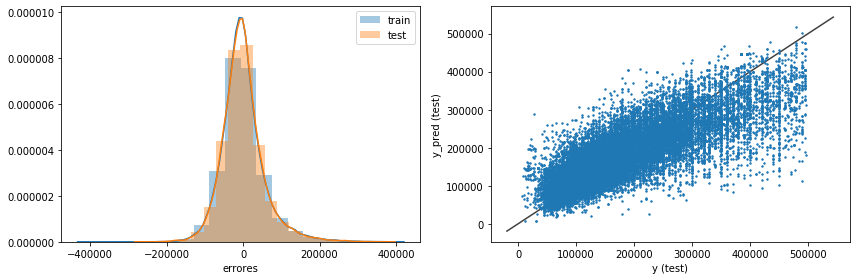



regresion con regularizacion ridge


Raíz del error cuadrático medio en Train: 55821.59547907665
Raíz del error cuadrático medio en Test: 55228.889786587


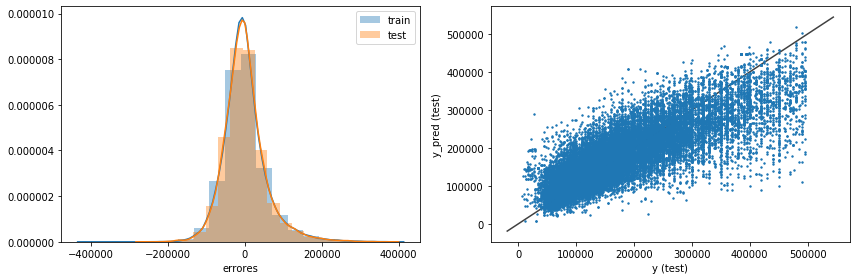





REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 3


C:\Users\Rodrigo Siu\.conda\envs\prueba6\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24119e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rodrigo Siu\.conda\envs\prueba6\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24443e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rodrigo Siu\.conda\envs\prueba6\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24131e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rodrigo Siu\.conda\envs\prueba6\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21172e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Rodrigo Siu\.conda\envs\prueba6\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAl



Raíz del error cuadrático medio en Train: 52106.15968030471
Raíz del error cuadrático medio en Test: 51965.01614657851


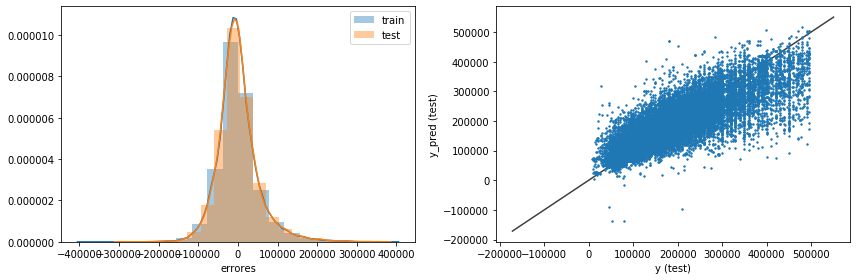



regresion con regularizacion ridge


Raíz del error cuadrático medio en Train: 56376.419712744675
Raíz del error cuadrático medio en Test: 55789.31764168852


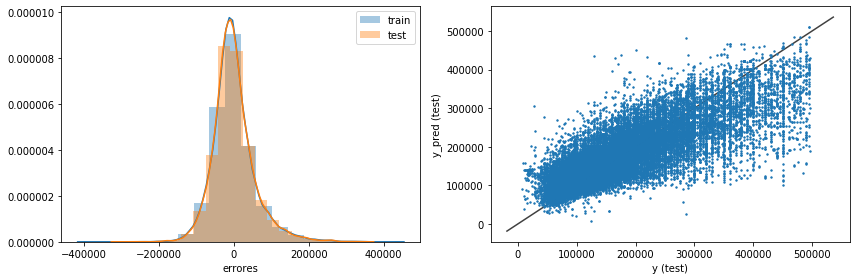





REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 4


Raíz del error cuadrático medio en Train: 49698.061023013455
Raíz del error cuadrático medio en Test: 90040.6333013531


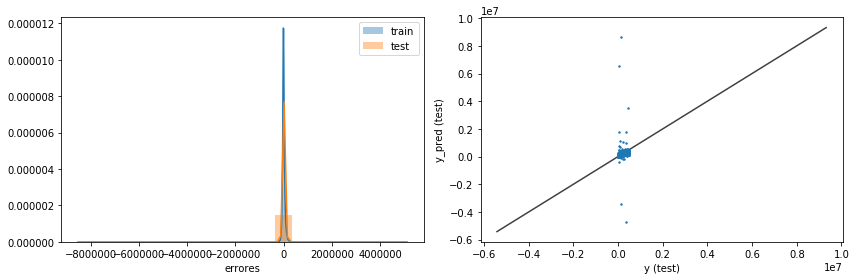



regresion con regularizacion ridge


Raíz del error cuadrático medio en Train: 54664.70034455666
Raíz del error cuadrático medio en Test: 54277.7064408664


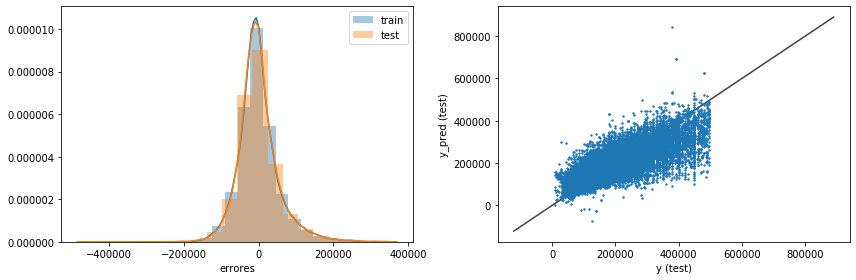

In [79]:
for idx,potencia_maxima in enumerate(range(1,5)):
    print(f'REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO {idx + 1}')
    
    poly_features = PolynomialFeatures(potencia_maxima, include_bias=False)
  
  # transformamos los datos al numero de grados especificados arriba
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly=  poly_features.fit_transform(X_test)
  # entrenamos los modelos, en el de regularización hacemos grid search
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    ridge=Ridge()
    param_grid = {'alpha':[.01,.05,.1,.5,1,15,20,100],
              }
    reg_ridge = GridSearchCV(ridge, param_grid=param_grid, cv=5,scoring='neg_root_mean_squared_error')
    #reg_ridge = Ridge(alpha=20)
    reg_ridge.fit(X_train_poly,y_train)
      
  # predecimos en train data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    y_train_predicted2 = reg_ridge.predict(X_train_poly)
  # predecimos en test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    y_test_predict2 = reg_ridge.predict(poly_features.fit_transform(X_test))
  # evaluamos el modelo en train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    rmse_train2= np.sqrt(mean_squared_error(y_train, y_train_predicted2))
  
  #  evaluamos el modelo en test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    rmse_test2= np.sqrt(mean_squared_error(y_test, y_test_predict2))
  
    print("\n")
      
    evaluar_regresion(poly_model, X,y, X_train_poly, X_test_poly, y_train, y_test)
    print("\n")
    print('regresion con regularizacion ridge')
    
    print("\n")
    
    evaluar_regresion(reg_ridge, X,y, X_train_poly, X_test_poly, y_train, y_test)
    print("\n")
    print("\n")
  

***Entrenamiento modelos sin optimización ni regularización***


(92065, 1000) (30689, 1000)
Pendientes: [ 5.03930144e+03  2.50068061e+06 -8.98909633e+06  1.04974679e+08
 -2.22597370e+08 -3.01814644e+08  1.60054419e+09 -7.85024558e+08
 -1.02720200e+09  1.62485903e+09  2.33241242e+04  1.32933289e+06
 -3.40816853e+06 -3.95444794e+06  5.24786371e+06  1.03458985e+07
 -1.02703703e+07 -8.13141295e+06  1.35810748e+07  5.39719729e+06
  1.27021751e+07 -2.20821292e+08 -3.06511267e+07  9.35457197e+07
  2.04619002e+08 -4.39872984e+08 -3.86905954e+08  4.14786397e+08
 -3.61136045e+08  1.02309730e+08  1.09091925e+09 -8.13713649e+08
 -1.27370110e+09  2.71064942e+09  1.49312901e+09 -5.45809715e+09
 -5.63020840e+08 -1.61395909e+08 -4.20977174e+07 -2.13958519e+08
  1.24685808e+09  2.95035290e+09 -6.87899599e+08  2.67638271e+09
  1.01250495e+08  6.50835133e+08 -2.19159522e+08 -9.21531013e+08
  3.18089683e+08 -2.58800089e+08  8.10322615e+08 -7.49557918e+08
 -2.39511836e+09  6.78018163e+08 -4.36789115e+08  4.41905947e+07
 -5.07571259e+09 -8.02732370e+09 -9.58998692e+09 -

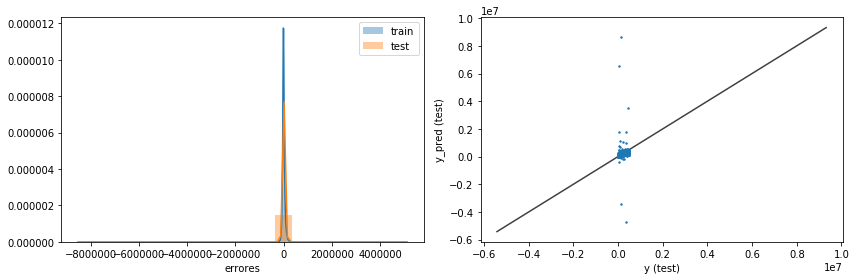

In [80]:
#Entrenamos nuestro mejor modelo del ciclo anterior
poly = PolynomialFeatures(degree = 4, include_bias=False) 
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(f'Pendientes: {reg_2.coef_}')
print(f'Ordenada: {reg_2.intercept_}')
evaluar_regresion(reg_2, X,y, X_train_new, X_test_new, y_train, y_test)

**Entrenamos nuestro modelo Random Forest sin optimización de parametros.**

In [81]:
clf = RandomForestRegressor(n_estimators=250,criterion='mse')
clf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Raíz del error cuadrático medio en Train: 17523.947022655164
Raíz del error cuadrático medio en Test: 39785.194221429236


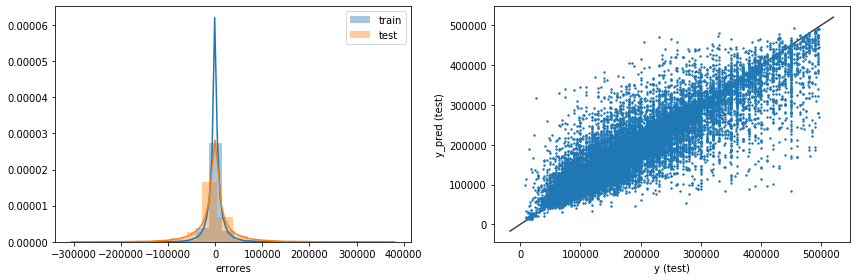

In [82]:
evaluar_regresion(clf, X,y, X_train, X_test, y_train, y_test)

***Procedemos a hacer optimización de hiperparametros con los dos modelos elegidos.***

In [83]:
# Grilla para Grid Search
ridge=Ridge()
param_grid = {'alpha':[.01,.1,.5,1,5,10,15,20,100],
              }

model = GridSearchCV(ridge, param_grid=param_grid, cv=5,scoring='neg_root_mean_squared_error')
model.fit(X_train_new, y_train)
print("Mejores parametros: "+str(model.best_params_))


Mejores parametros: {'alpha': 100}


Pendientes: [ 3.29272102e+03  2.44687917e+04  9.20926552e+04  1.81195660e+05
  1.26079419e+05  2.24530674e+04  3.43880346e+04 -6.69851403e+04
  5.28241231e+04  2.31207913e+03 -9.93844707e-01 -1.38447033e+03
  4.31755199e+03  9.81239631e+03  4.20440389e+03 -3.28279937e+03
 -5.23200670e+03 -3.95409413e+03 -5.78684077e+03  1.07267761e+04
 -5.90069276e+03 -8.98467207e+03  2.66307803e+04  3.70278788e+04
  2.76044117e+04  9.82717570e+03 -2.29500718e+04  3.49601649e+04
  4.75397626e+03  8.63731105e+04  5.75742113e+04  1.68956419e+05
 -2.47060703e+03  1.92810135e+04 -6.45318919e+03  1.44068950e+05
  1.27367114e+04 -7.47931097e+04 -8.32594623e+04 -2.40013550e+04
 -2.91734374e+04 -3.28768837e+03 -6.34267668e+04 -6.86327697e+03
  4.80254656e+04  1.16562044e+04  4.71764200e+02 -2.45245467e+04
  4.73448119e+04 -1.84658241e+04  4.50606158e+04  1.14811649e+04
  2.69834349e+04  4.37529604e+04  3.30126402e+04 -8.97253537e+03
  2.52118969e+03  3.31040411e+04 -4.79087543e+03  5.73562635e+04
 -2.58396634e

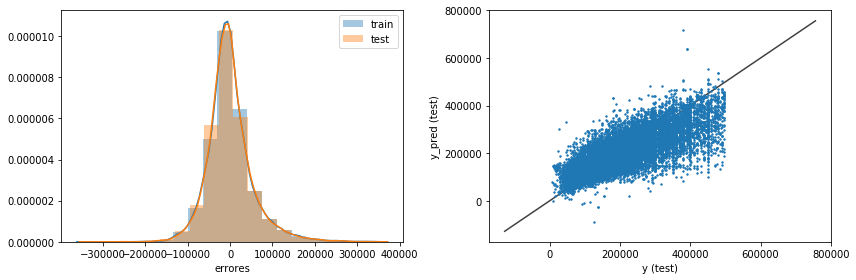

In [84]:
reg_ridge = Ridge(alpha=20)
reg=reg_ridge.fit(X_train_new,y_train)
print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

y_train_pred=reg.predict(X_train_new)
y_test_pred =reg.predict(X_test_new)
rmse_train_modelo_5 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_modelo_5 = np.sqrt(mean_squared_error(y_test, y_test_pred))

evaluar_regresion(reg, X_nuevo,y,X_train_new, X_test_new, y_train, y_test)

Para entrenar nuestro modelo Random Forest, buscaremos los mejores hiperparametros para lograr una mejora sustancial en nuestro proceso, para ello buscaremos con nuestro Gridsearch dentro de los hiperparametros siguientes:
N_estimadores, Max_features, max_depth, min_samples_split,mins_sampleas_leaf y bootstrap, todos estos con la finalidad de una mejor performance y ya que son los hiperparametros más importantes para que el modelo realmente sea bueno.

Principalmente el número de estimadores es para que tenga más arboles con los cuales entrenar, max_depth lo utilizamos para ver la mejor profundidad a la que aprende nuestro modelo.

In [85]:
# Numero de estimadores
n_estimadores= [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]
# Numero de caracteristicas.
max_features = ['auto', 'sqrt']
max_features.append(None)
# Maximum numero de arboles de profundidad.
max_depth = [int(x) for x in np.linspace(1, 10, num = 4)]
max_depth.append(None)

min_samples_split = [2, 5, 15]
min_samples_leaf = [1, 2,15]
# Método de selección.
bootstrap = [True, False]
# Creamos la grilla
random_grid = {'n_estimators': n_estimadores,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
               
print(random_grid)

{'n_estimators': [50, 87, 125, 162, 200], 'max_features': ['auto', 'sqrt', None], 'max_depth': [1, 4, 7, 10, None], 'min_samples_split': [2, 5, 15], 'min_samples_leaf': [1, 2, 15], 'bootstrap': [True, False]}


In [86]:
rf = RandomForestRegressor()
#Usamos random forest, con grilla random y cv:5, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=50, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 64.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [87]:
#Imprimimos los mejores parametros.
print("Mejores parametros: "+str(rf_random.best_params_))

Mejores parametros: {'n_estimators': 125, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


Raíz del error cuadrático medio en Train: 23654.257797472783
Raíz del error cuadrático medio en Test: 40064.34029400301


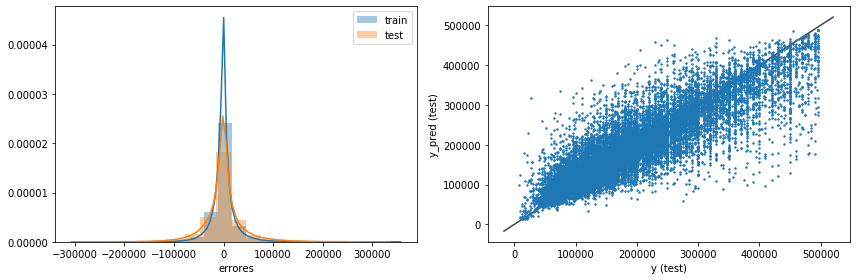

In [88]:
evaluar_regresion(rf_random, X,y, X_train, X_test, y_train, y_test)

Entrenamos el modelo con los mejores parametros.

In [148]:
clf2 = RandomForestRegressor(n_estimators=125,criterion='mse',max_features='sqrt',n_jobs=-1,min_samples_leaf=2,oob_score=True,min_samples_split=2, random_state = 50)
clf2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=125, n_jobs=-1, oob_score=True,
                      random_state=50, verbose=0, warm_start=False)

Raíz del error cuadrático medio en Train: 23611.459509323075
Raíz del error cuadrático medio en Test: 39948.74900978441


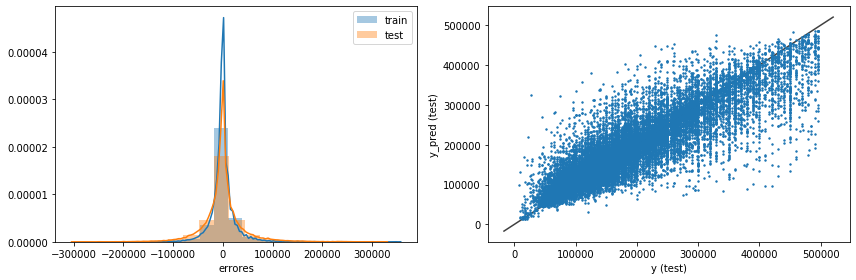

In [149]:
evaluar_regresion(clf2, X_nuevo,y, X_train, X_test, y_train, y_test)
y_train_pred=clf2.predict(X_train)
y_test_pred =clf2.predict(X_test)
rmse_train_modelo_6 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_modelo_6 = np.sqrt(mean_squared_error(y_test, y_test_pred))

<font align='/center;' color='dark' face='arial' size=5> Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A.</font>


***A continuación mostramos la comparativa entre los dos modelos optimizados y regulados.***

% de mejora entre modelos: Regresión Polinomial vs Random Forest
% de mejora entre modelos: 24.98


<Figure size 864x576 with 0 Axes>

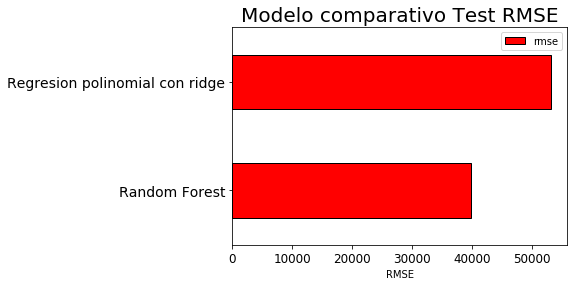

In [91]:
fig=plt.figure(figsize=(12,8))

model_comparison = pd.DataFrame({'model': ['Regresion polinomial con ridge', 'Random Forest',
                                                                            ],
                                 'rmse': [rmse_test_modelo_5, rmse_test_modelo_6, 
                                         ]})

model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 12)
plt.title('Modelo comparativo Test RMSE', size = 20);

fig.autofmt_xdate()
fig.autofmt_xdate()
fig.tight_layout()

print('% de mejora entre modelos: Regresión Polinomial vs Random Forest')
mejora(rmse_test_modelo_5,rmse_test_modelo_6)


% de mejora entre modelos:Arbol de decisión vs Random Forest
% de mejora entre modelos: 18.13


<Figure size 864x576 with 0 Axes>

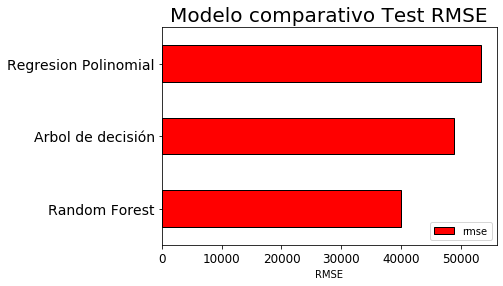

In [92]:
fig=plt.figure(figsize=(12,8))

model_comparison = pd.DataFrame({'model': ['Arbol de decisión','Regresion Polinomial', 'Random Forest',
                                                                            ],
                                 'rmse': [rmse_test_modelo_4,rmse_test_modelo_5, rmse_test_modelo_6, 
                                         ]})

model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 12)
plt.title('Modelo comparativo Test RMSE', size = 20);

fig.autofmt_xdate()
fig.autofmt_xdate()
fig.tight_layout()

print('% de mejora entre modelos:Arbol de decisión vs Random Forest')
mejora(rmse_test_modelo_4,rmse_test_modelo_6)


***¿Cuál elegirías? Justifica.***

Como podemos observar en la ultima gráfica comparativa, nos damos cuenta que al comparar los 3 modelos con las mismas técnicas de preprocesamiento, nos damos cuenta que el arbol de decisión sigue dando una performance bastante buena, no obstante eligiriamos como modelo principal el Random Forest, ya que aunque en teoria es un conjunto de arboles, haciendo ensambles se mejora bastante el modelo y aunque tiende a underfiting con un random grinch es posible minimizar esto.

<font align='/center;' color='dark' face='arial' size=7>Interpretación de modelos.</font>

***Visualizamos las variables más importantes***

¿Qué variables fueron relevantes para el modelo para hacer una predicción?

A continuación mostramos la importancia de las variables así como tambien una gráfica para ejemplificar de mejor manera

Creamos un dataframe de los datos reducidos para ver los valores aproximados que contiene.

In [93]:
data_PCA=pd.DataFrame(X_nuevo)
data_PCA

,0,1,2,3,4,5,6,7,8,9
0,-10.045901,-0.243767,-0.007902,0.044662,-0.093453,1.522123,0.031936,-0.108049,-0.081896,0.007341
1,-23.051704,-0.108735,-0.120959,-0.460508,0.554167,1.152551,0.055596,0.832335,-0.253772,0.087641
2,-18.053583,-0.242702,-0.112451,-0.468020,0.575586,1.134007,0.056420,0.832109,-0.251459,0.088324
3,-33.045445,0.184210,-1.451245,-0.249329,0.033739,0.810593,0.772501,0.013420,0.059640,0.032790
4,-12.055872,-0.393575,-0.181069,-0.484985,0.588639,1.091607,0.026267,-0.248340,-0.176956,-0.350855
...,...,...,...,...,...,...,...,...,...,...
122749,-20.056595,-0.295937,-0.816049,0.054705,-0.280927,-0.367870,0.578030,0.023367,0.171958,0.004354
122750,21.987227,0.705529,-0.210457,0.567124,-0.261423,-0.353461,-0.078050,-0.009549,-0.147394,-0.015604
122751,-33.077049,-0.949381,-0.471559,0.455445,-0.117804,-0.083235,-0.043246,-0.035693,-0.155093,0.010335
122752,-30.053296,-0.056426,-0.481054,0.369334,0.007993,-0.267212,-0.058549,-0.026905,-0.190032,-0.004789


In [94]:
#Imprimimos una lista de las variables más importantes para el modelo
list(clf2.feature_importances_)

[0.2971562853607269,
 0.04956896005918715,
 0.20996117901165978,
 0.06919871724702852,
 0.09229780288134166,
 0.045000101796255874,
 0.05840011621386497,
 0.06934059225813564,
 0.056734056468763595,
 0.05234218870303598]

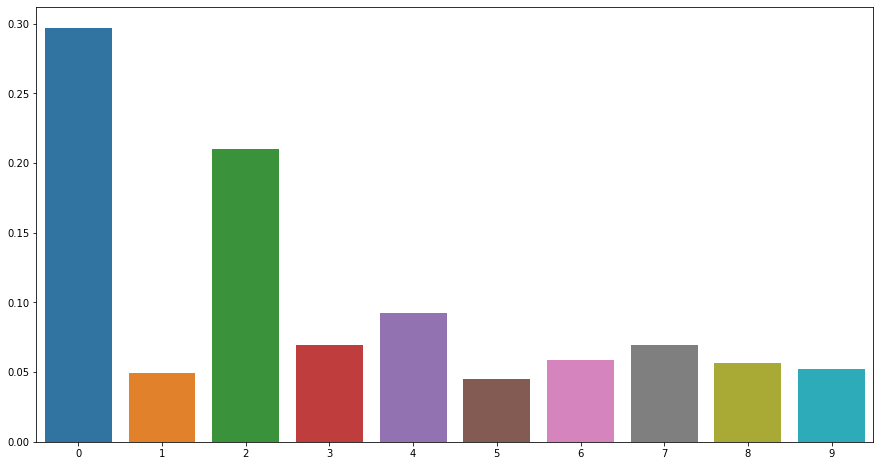

In [95]:
#Gráficamos para una mejor visualización.
S=pd.DataFrame(X_train)
importances = clf2.feature_importances_
columns = S.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

¿Qué variables fueron relevantes para el modelo para hacer una predicción?


Como podemos observar en la gráfica anterior, nos muestra que de nuestras variables de entrenamiento, la principal variable es la 0, seguido de la variable 2 y la 4, cobra sentido debido a que al realizar PCA la mayor información se guarda en las primeras lienas de la matriz.

En estas variables se encuentran contenidas las variables más relevantes ya estudiadas, como lo son principalmente surface covered, bathrooms, támbien cobra relevancia mencionar que la variable lat muestra gran aporte para un mejor entrenamiento.

Todo esto se concluye despues de entrenar los modelos en varias ocasiones, modificando los valores de entrada para el entrenamiento.

***¿Cuáles no?***

Despues de varias pruebas, quitando variables, comnbiando variables y entrenandolas con cada una de estas modificaciones, es importante mencionar que de manera inesperada la variable bedrooms es de las variables menos relevantes, ya que al realizar algunas pruebas sin ella , se concluyó una mejora de hasta .67% cosa que con ninguna otra variable al eliminarse genera una mejora ni cerca del .1%

***Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes***

In [96]:
#Creamos una función para evaluar de manera aleatoria algunos arboles de nuestro random forest
def evaluar_random(k):
    n=0
    c=list()
    d=list()
    
    
    while n<k:
        
        i=np.random.randint(125)
        clf_azar=clf2.estimators_[i]
        s=list(clf_azar.feature_importances_)
        n+=1
        c.append(i)
        d.append(s)
        
        diccionario={}
        t=0
        for l in c:
            
            diccionario[l]=d[t]
            t+=1
    data=pd.DataFrame(diccionario)
    return data  

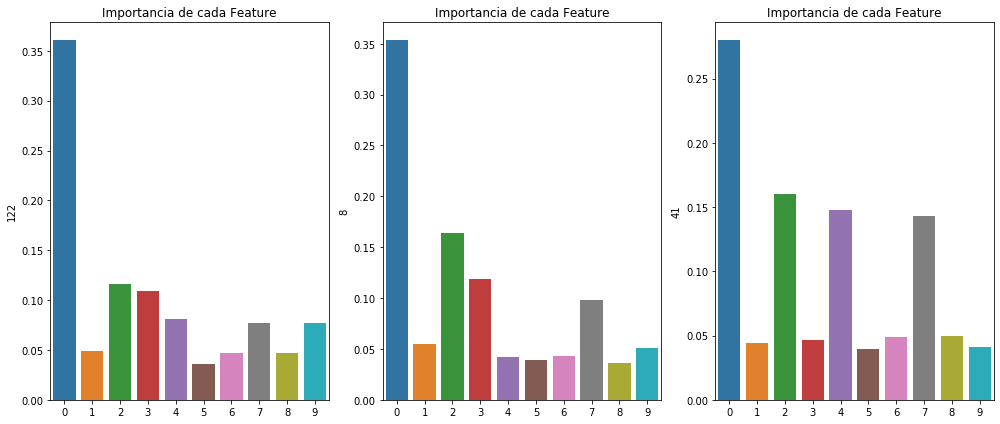

,122,8,41
0,0.360456,0.353324,0.279783
1,0.049130,0.055068,0.044191
2,0.116567,0.163545,0.159989
3,0.108925,0.118897,0.046682
4,0.081187,0.041793,0.148023
5,0.035940,0.038742,0.039507
6,0.046611,0.043151,0.048514
7,0.077267,0.098433,0.142845
8,0.046877,0.035863,0.049342
9,0.077041,0.051184,0.041124


In [97]:
#Seleccionamos el número de arboles al azar que deseamos comparar, cabe mencionar que nos genera un dataframe con el numero que deseemos, no obstante la gráfica solo nos muestra 3 columnas del total
data=evaluar_random(3)
                   
data

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3=  fig.add_subplot(1,3,3)


importances = data.iloc[:,0]
columns = data.index
importances2 = data.iloc[:,1]
importances3 = data.iloc[:,2]

sns.barplot(columns, importances,ax=ax1)
sns.barplot(columns, importances2,ax=ax2)
sns.barplot(columns, importances3,ax=ax3)

ax1.set_title('Importancia de cada Feature')
ax2.set_title('Importancia de cada Feature')
ax3.set_title('Importancia de cada Feature')
fig.tight_layout()
plt.show()

data

***¿En qué se diferencian esos árboles? ¿Por qué?***

Si seleccionamos algunos arboles al azar, tienden a diferenciarse, no obstante siempre hay varios que al final se repiten y esto se debe a la propiedad del mismo modelo ya que para extraer lo mejor de los datos , ya que hace una mezcla de datos a entrenar y de features para cada entrenamiento, logrando asi que el modelo mejore su aprendizaje.

***¿coincide con lo que esperabas a partir de tu experiencia con este dataset?***

Si coincide que las caracteristicas más importantes que conluimos en la primer parte, tambien fueron importantes para este último modelo, no obstante debido a la ingenieria de features y el modelo avanzado utilizado, se mejoró considerablemente los resultados.

<font align='/center;' color='dark' face='arial' size=6> Errores del modelo.</font>

A continuación mostraremos la comparativa de nuestro modelo elegido, entre sus resultados en entrenamiento y en su testeo.

<Figure size 864x576 with 0 Axes>

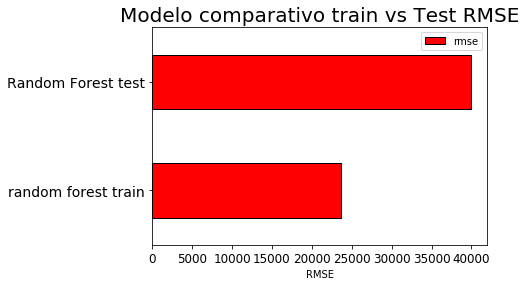

In [154]:
fig=plt.figure(figsize=(12,8))

model_comparison = pd.DataFrame({'model': ['random forest train', 'Random Forest test',
                                                                            ],
                                 'rmse': [rmse_train_modelo_6, rmse_test_modelo_6, 
                                         ]})

model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 12)
plt.title('Modelo comparativo train vs Test RMSE', size = 20);

fig.autofmt_xdate()
fig.autofmt_xdate()
fig.tight_layout()



In [151]:
propiedades_final.price.describe()

count    122754.000000
mean     175478.747104
std       93264.989239
min        6000.000000
25%      105000.000000
50%      150300.500000
75%      225000.000000
max      496000.000000
Name: price, dtype: float64

<font align='/center;' color='red' face='arial' size=3> ¿Que podemos concluir de nuestro modelo?, ¿En donde acierta, en donde falla?.</font>

 

<div style="text-align: justify">Si bien podemos ver que las cosas en la que acierta es que nuestro performance de entrenamiento es relativamente bueno, comparando que nuestros rangos de precios oscilan entre los 6000 y los 496,000, con una desviación estandar de 93264, podemos  tomaren cuenta que nuestro valor de entrenamiento  ronda los 23000 esto nos dice que tiene un error aceptable, no podriamos decir que el mejor, pero es factible, sin embargo nuestro modelo tiene ciertos problemas de overfiting, ya que nuestro modelo en su testeo es donde presenta mayor error, y tiende a no generalizar bien, esto se puede deber a diversos factores, entre ellos que nuestros datos no presentan la misma distribución, y aunque se realizo ajustes para ello, considero que el modelo tiende a hacer overfiting.. </div>

<font align='/center;' color='dark' face='arial' size=5> Desafío Opcional.</font>

<div style="text-align: justify">Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí? </div>


In [101]:
propiedades_final.columns

Index(['lat', 'lon', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'rooms', 'bedrooms', 'Palermo', 'Tigre', 'Almagro', 'Villa Crespo',
       'Caballito', 'Belgrano', 'Recoleta', 'La Plata', 'Villa Urquiza',
       'La Matanza', 'Lomas de Zamora', 'Tres de Febrero', 'Balvanera',
       'Barrio Norte', 'Vicente López', 'Pilar', 'Flores', 'Morón',
       'San Isidro', 'Nuñez', 'Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Capital Federal', 'Casa de campo', 'Cochera',
       'Departamento', 'Depósito', 'Local comercial', 'Lote', 'Oficina',
       'Otro', 'PH'],
      dtype='object')

In [102]:
#HAREMOS CLUSTERING DE ACUERDO AL TIPO DE PROPIEDAD Y LA ZONA EN DONDE SE UBICA.
prop=propiedades_final[['Palermo', 'Tigre', 'Almagro', 'Villa Crespo','Bs.As. G.B.A. Zona Oeste',
       'Bs.As. G.B.A. Zona Sur', 'Capital Federal','Caballito', 'Belgrano', 'Recoleta', 'La Plata', 'Villa Urquiza',
       'La Matanza', 'Lomas de Zamora', 'Tres de Febrero', 'Balvanera',
       'Barrio Norte', 'Vicente López', 'Pilar', 'Flores', 'Morón',
       'San Isidro', 'Nuñez','Casa de campo', 'Cochera','Departamento', 'Depósito', 'Local comercial', 'Lote', 'Oficina','Otro', 'PH']]


In [103]:
X=prop

In [104]:
pca = PCA(n_components=2)
X_nuevo3 = pca.fit_transform(X) 

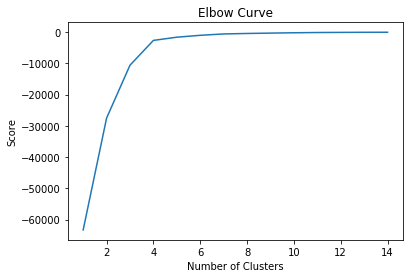

In [105]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_nuevo3).score(X_nuevo3) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [118]:
kmeans_1 = KMeans(n_clusters=4,init='random',random_state=None)

In [119]:
kmeans_1.fit(X_nuevo3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [120]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(122754,)


In [121]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[ 0.12964755  1.09924989]
 [-0.44041174 -0.0314654 ]
 [ 1.06967304  0.34075785]
 [ 0.54039322 -0.53706908]]


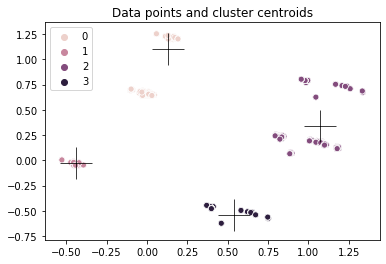

In [122]:
sns.scatterplot(X_nuevo3[:, 0], X_nuevo3[:, -1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

<font  color ='dark' style='text-align:center'  face='arial' size=6> Conclusiones clustering. </font>

<div style="text-align: justify">Lo que podemos llegar a ver es que cuando realizamos clustering de acuerdo a las ubicaciones y propiedades, podemos ver que singularmente ciertos grupos guardan ciertas caracteristicas y no necesariamente al tipo de propiedades si no a caracteristicas muy particulares del grupo, llegando a formarse 4 culster importantes. </div>




<font style='text-align: center' color='dark' face='arial' size=7> Conclusiones Generales.</font>

<div style="text-align: justify"> Como podemos analizar, si bien hubo una mejora significativa de más de un 50 porciento de nuestro primer modelo entrenado hasta nuestro modelo Random Forest elegido, esto no significa que nuestro modelo generalize de mejor forma, si bien funciona adecuado, no podria tomarse como un modelo listo a implementarse, considero que dentro de las cosas necesarias estan: mayor cantidad de  datos que son importantes para el modelo, asi como tambien una mayor cantidad de datos de entrenamiento disponibles para que nuestro modelo logre saltar la brecha entre la memorización de los mismos y la generalización adecuada, tambien seria recomendable profundizar en otro tipos de caracteristicas que podrian darle una mejor predicción al modelo, tal es el caso de los valores faltantes , asi tambien una serie temporal de los precios a lo largo del año que esto pueda provocar fluctuaciones en el modelo, tambien podria aportar conseguir más información adicional para nuestro modelo,talvez y solo asi podriamos llegar a mejores resultados.</div>

<div style="text-align: justify">Otro punto y no menos importante que podría estar afectando nuestro modelo es las diferentes distribuciones que se obtienen de acuerdo a las diferentes caracteristicas, tal es como el tipo de propiedad o la distribución de casas en las diferentes regiones, si bien es cierto, ocupamos todos los datos que se nos brindaron, esto mismo no ha ayudado a que el modelo presente una mejor performance, ya que las diferentes distribuciones del mismo obtaculiza una generalización adecuada, si bien se podria eliminar las caracteristicas con datos minimos no obstante hacer esto nos impacta en la cantidad de información que recibe el modelo para entrenar, he allí donde talvez por ejemplo tener mas datos en los tipos de propiedades con menor numero de datos podrian apoyar a presentar una distribución más similar a las mayorias, logrando así que el modelo mejore su aprendizaje y a su vez su generalización.</div>

    
<div style="text-align: justify"> Sin embargo sabemos que no siempre tendremos la oportunidad de conseguir toda esta información adicional, y tendremos que trabajar con los datos que tengamos a la mano, quizás otro factor importante es la experiencia propia sobre el dataset y el problema mismo, son factores que al final del día importan e impactan en los resultados obtenidos, en conclusión, podría decir que nuestro modelo es aceptable pero talvez pudiera generalizar de mejor forma. </div>